## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

### Check Null and Missing Values

In [ ]:
data_null = boston.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(boston))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


### Duplicate Values

In [ ]:
boston.duplicated().sum()

0

### Statistical Summary

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Distribution and outlier

In [ ]:
feat_num = list(boston)[:-1]
feat_num

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

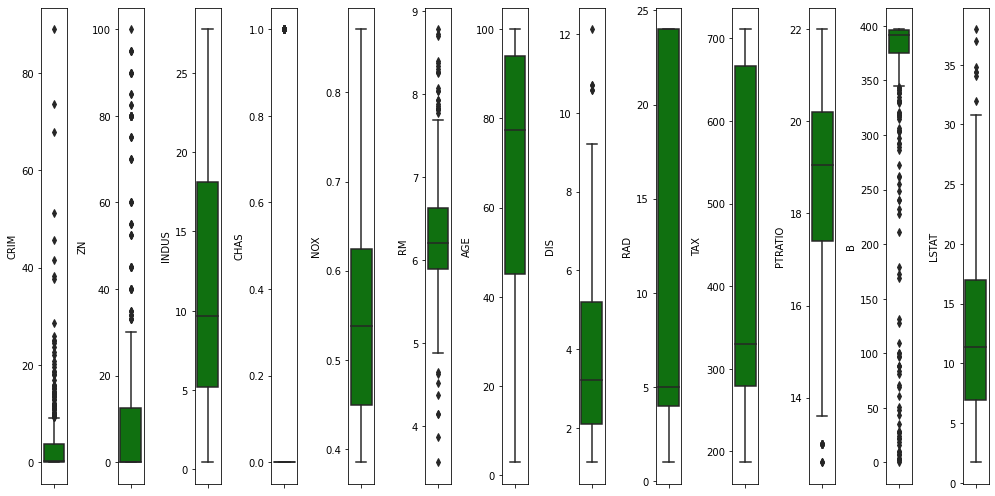

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(feat_num)):
    plt.subplot(1, 14, i+1)
    sns.boxplot(y=boston[feat_num[i]],color='green',orient='v')
    plt.tight_layout()
    

In [ ]:
boston['CRIM'] = np.log10(boston['CRIM'] + 1)
boston['ZN'] = np.log10(boston['ZN'] + 1)
boston['LSTAT'] = np.log10(boston['LSTAT'] + 1)

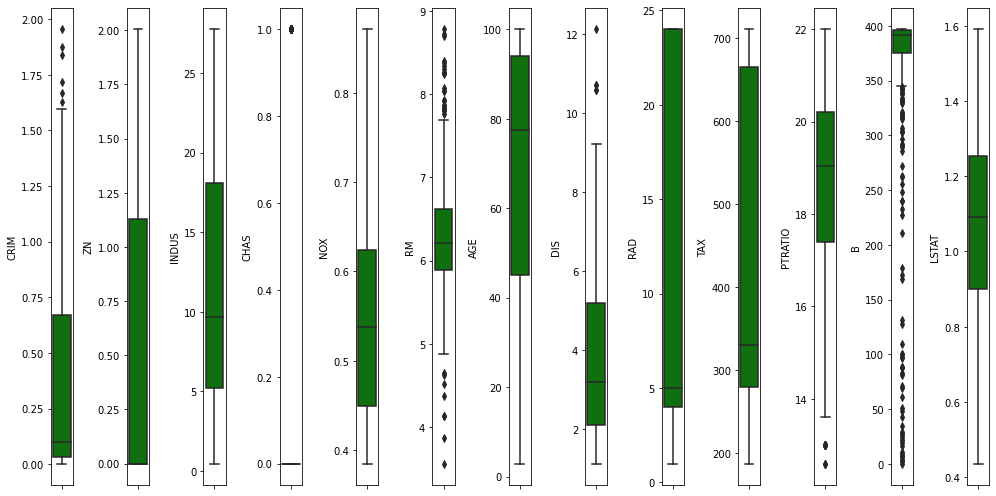

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(feat_num)):
    plt.subplot(1, 14, i+1)
    sns.boxplot(y=boston[feat_num[i]],color='green',orient='v')
    plt.tight_layout()
    

tidak dilakukan remove terhadap outlier karena data yang dimiliki terlalu sedikit, sehinggu cukup di transformasi untuk handling outlier

### Correlation Matrix

<AxesSubplot:>

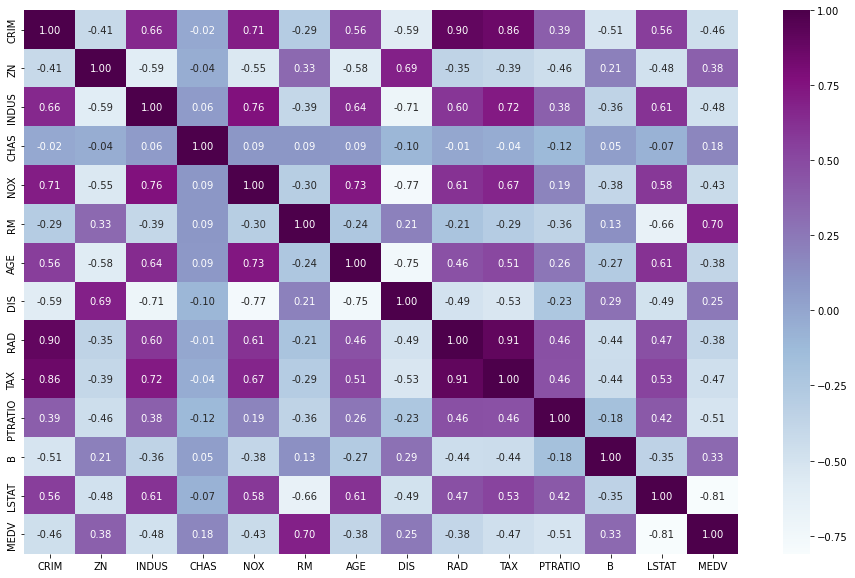

In [ ]:
corr_= boston.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

korelasi fitur dan target cukup bagus sehingga dapat menggunakan model linear yaitu linear regression<br><br>
terdapat multicollinearity, sehingga akan di drop sebagian fitur

In [ ]:
boston = boston.drop(['RAD', 'TAX','NOX','AGE'], axis=1) 

<AxesSubplot:>

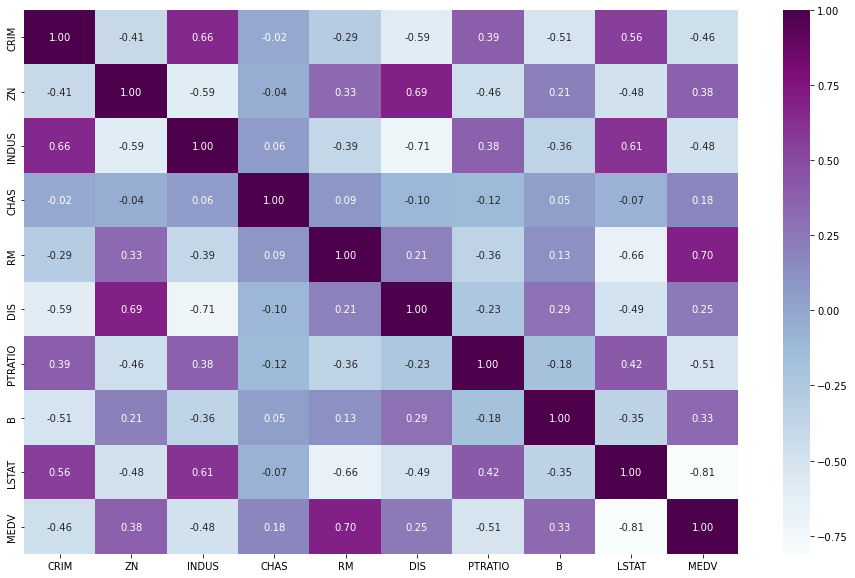

In [ ]:
corr_= boston.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

### Split fitur and target

In [ ]:
X = boston.drop(['MEDV'], axis=1)
y = boston[['MEDV']]

In [ ]:
feats = list(X)
feats

['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
boston_std = pd.DataFrame(data = X_std, columns = feats)
boston_std.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,PTRATIO,B,LSTAT
0,-0.789960,1.229330,-1.287909,-0.272599,0.413672,0.140214,-1.459000,0.441052,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,0.194274,0.557160,-0.303094,0.441052,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,1.282714,0.557160,-0.303094,0.396427,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,1.016303,1.077737,0.113032,0.416163,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,1.228577,1.077737,0.113032,0.441052,-1.170492


### PCA (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-2.517180,0.232009,0.394476,0.080798,0.872794,-0.021732,-0.113687,0.505575,-0.654097
1,-0.911472,-0.273002,-0.441132,-0.471573,0.162691,-0.689879,-0.147698,0.043755,0.489305
2,-1.732619,0.533832,0.069448,-1.397126,-0.262285,-0.588376,0.241669,0.351615,0.530732
3,-2.221465,0.068699,-0.013869,-1.365813,-0.882825,-0.775329,0.056870,0.911013,0.531178
4,-1.922244,-0.035496,-0.026025,-1.190246,-0.765701,-0.696657,-0.412979,0.261310,0.698185


#### Skree Plot

In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [4.09169289 1.22252811 1.00836173 0.81588294 0.68734153 0.47164013
 0.27945448 0.25273997 0.18818   ]
Explained variance ratio: [45.37340595 13.55680057 11.18187685  9.04745027  7.62203494  5.23008923
  3.09891336  2.8026721   2.08675672]


<BarContainer object of 9 artists>

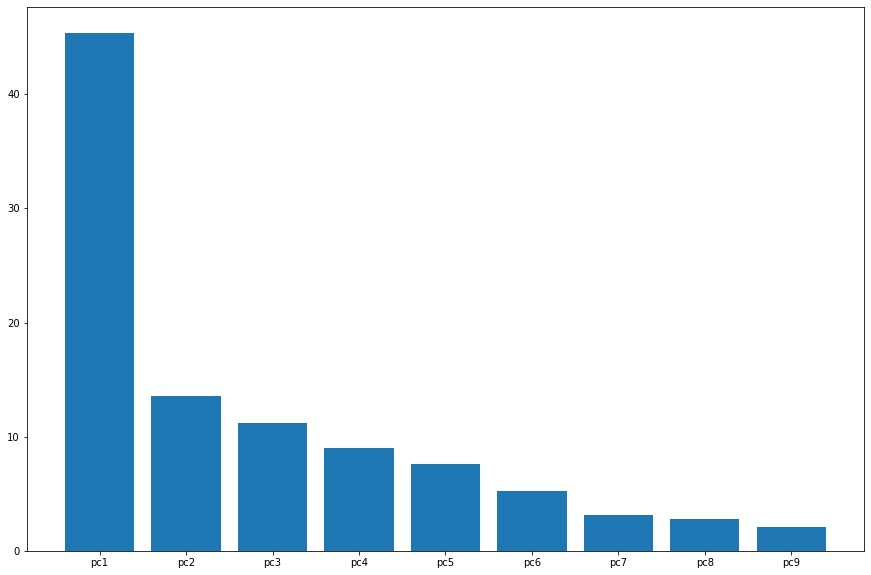

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'], pca.explained_variance_ratio_ * 100)

In [ ]:
pca.explained_variance_ratio_[0:6]*100

array([45.37340595, 13.55680057, 11.18187685,  9.04745027,  7.62203494,
        5.23008923])

In [ ]:
pca.explained_variance_ratio_[0:6].sum()*100

92.01165781582279

hanya menggunakan 6 PC karena sudah mengcover 90% informasi data original

#### Feature Reduction

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-2.517180,0.232009,0.394476,0.080798,0.872794,-0.021732
1,-0.911472,-0.273002,-0.441132,-0.471573,0.162691,-0.689879
2,-1.732619,0.533832,0.069448,-1.397126,-0.262285,-0.588376
3,-2.221465,0.068699,-0.013869,-1.365813,-0.882825,-0.775329
4,-1.922244,-0.035496,-0.026025,-1.190246,-0.765701,-0.696657


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

#### Without PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 9)
(102, 9)
(404, 1)
(102, 1)


#### With PCA

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size = 0.2, random_state=5)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(404, 6)
(102, 6)
(404, 1)
(102, 1)


## Regression Model (20 point)

In [ ]:
from sklearn.linear_model import LinearRegression

### Without PCA

In [ ]:
# define the model
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)

LinearRegression()

### With PCA

In [ ]:
# define the model
simple_reg_pca = LinearRegression()
simple_reg_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

### Without PCA

In [ ]:
y_pred = simple_reg.predict(X_test)

print('R-squared for test data is {}'.format((r2_score(y_pred, y_test))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(y_pred, y_test))*100))
print('MAE for test data is {}'.format(mean_absolute_error(y_pred, y_test)))

R-squared for test data is 75.84288043812022
RMSE for test data is 4.039890876605426
MAPE for test data is 21.519503790062867
MAE for test data is 3.0140265384923848


### With PCA

In [ ]:
y_pred_pca = simple_reg_pca.predict(X_test_pca)

print('R-squared for test data is {}'.format((r2_score(y_pred_pca, y_test_pca))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(y_pred_pca, y_test_pca))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(y_pred_pca, y_test_pca))*100))
print('MAE for test data is {}'.format(mean_absolute_error(y_pred_pca, y_test_pca)))

R-squared for test data is 78.19638088104232
RMSE for test data is 3.981585356924079
MAPE for test data is 636.4081618984324
MAE for test data is 2.8389441417164334


terlihat bahwa menggunakan PCA menghasilkan performa yang lebih baik di semua metric evaluation

## Other Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest - Without PCA

In [ ]:
reg_rf = RandomForestRegressor(random_state=7)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

### Random Forest - With PCA

In [ ]:
# define the model
reg_rf_pca = RandomForestRegressor(random_state=7)
reg_rf_pca.fit(X_train_pca, y_train_pca)

RandomForestRegressor(random_state=7)

### Evaluation - Without PCA

In [ ]:
y_pred_rf = reg_rf.predict(X_test)

print('R-squared for test data is {}'.format((r2_score(y_pred_rf, y_test))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(y_pred_rf, y_test))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(y_pred_rf, y_test))*100))
print('MAE for test data is {}'.format(mean_absolute_error(y_pred_rf, y_test)))

R-squared for test data is 82.82251525800075
RMSE for test data is 3.512732297810128
MAPE for test data is 11.758626997951987
MAE for test data is 2.3776078431372545


### Evaluation - With PCA

In [ ]:
y_pred_rf_pca = reg_rf_pca.predict(X_test_pca)

print('R-squared for test data is {}'.format((r2_score(y_pred_rf_pca, y_test_pca))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(y_pred_rf_pca, y_test_pca))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(y_pred_rf_pca, y_test_pca))*100))
print('MAE for test data is {}'.format(mean_absolute_error(y_pred_rf_pca, y_test_pca)))

R-squared for test data is 75.64068061864103
RMSE for test data is 3.9513618054598663
MAPE for test data is 13.443210508219646
MAE for test data is 2.7375098039215673


untuk model random forest, terlihat bahwa menggunakan pca dapat menurunkan performa model